matrix([[0.64549485, 0.34599276, 0.34230578, 0.2995278 ],
        [0.11971802, 0.5259719 , 0.07414197, 0.05135908],
        [0.08960342, 0.05608954, 0.50891529, 0.04030729],
        [0.14518371, 0.0719458 , 0.07463696, 0.60880583]])
matrix([[1.63080190e-09, 8.74128802e-10, 8.64813882e-10, 7.56738044e-10],
        [3.02460002e-10, 1.32883472e-09, 1.87314985e-10, 1.29755458e-10],
        [2.26377358e-10, 1.41706685e-10, 1.28574229e-09, 1.01833805e-10],
        [3.66797463e-10, 1.81766511e-10, 1.88565567e-10, 1.53810941e-09]])


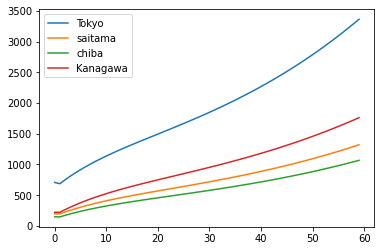

In [ ]:
import numpy as np
import pprint

N=36754193 # 人口動態調査(2020年1月1日時点)によると、東京圏(東京、埼玉、千葉、神奈川)の人口は3675万4193人だった

S=[np.matrix([[13971109], # 東京 (総人口，推計人口2021年4月1日)
             [7343453], # 埼玉
             [6281394], # 千葉
             [9214151]])]# 神奈川
I=[np.matrix([[708], #  東京
             [198], # 埼玉
             [148], # 千葉
             [222]])]# 神奈川
R=[np.matrix([[0], #  東京
             [0], # 埼玉
             [0], # 千葉
             [0]])]# 神奈川

#「自宅外就業者・通学者数」が全体の人流に相関していると信じて……

#H27自宅外就業者・通学者数
#,              （従業・通学都道府県）
#（常住都道府県）, 東京都, 埼玉県, 千葉県, 神奈川県
#東京都, 5424283, 140961, 82706, 238314
#埼玉県, 936105, 2727671, 43074, 28111
#千葉県, 716882, 41668, 2360747, 25966
#神奈川県, 1068513, 14035, 14932, 3513821

gamma=1/14 #回復率．（γ=1/感染者の回復日数とすることができるらしいので．回復日数を14日として）
R0=1.3
beta0=R0/gamma#R0=beta0/gamma (定義より)

population_flow=np.matrix(
[[5424283, 140961, 82706, 238314],
[936105, 2727671, 43074, 28111],
[716882, 41668, 2360747, 25966],
[1068513, 14035, 14932, 3513821]])

pf2=np.dot(population_flow,population_flow.T)#変更部分

#pprint.pprint(pf2)

sum_pf2=np.concatenate((
        pf2[:,0]/pf2[:,0].sum(axis=0),
        pf2[:,1]/pf2[:,1].sum(axis=0),
        pf2[:,2]/pf2[:,2].sum(axis=0),
        pf2[:,3]/pf2[:,3].sum(axis=0),
),axis=1)

beta=sum_pf2*beta0/N

pprint.pprint(sum_pf2)
pprint.pprint(beta)


x = range(0,60)

for t in x:
    contacts=np.matrix(np.matmul(np.array(S[t]),np.array(I[t])))
    dS = -np.matmul(beta,contacts)
    S.append(S[t] + dS)
    dI = -dS - gamma*I[t]
    dR = gamma*I[t]
    I.append(I[t] + dI)
    R.append(R[t] + dR)

from matplotlib import pyplot
s=[]
i={}
i["tokyo"]=[]
i["saitama"]=[]
i["chiba"]=[]
i["kanagawa"]=[]
i["sum"]=[]
r=[]

for t in x:
    s.append(S[t][0,0]+S[t][1,0]+S[t][2,0]+S[t][3,0])
    i["tokyo"].append(I[t][0,0])
    i["saitama"].append(I[t][1,0])
    i["chiba"].append(I[t][2,0])
    i["kanagawa"].append(I[t][3,0])
    i["sum"].append(I[t][0,0]+I[t][1,0]+I[t][2,0]+I[t][3,0])
    r.append(R[t][0,0]+R[t][1,0]+R[t][2,0]+R[t][3,0])

#pyplot.plot(x,s)
pyplot.plot(x,i["tokyo"],label="Tokyo")
pyplot.plot(x,i["saitama"],label="saitama")
pyplot.plot(x,i["chiba"],label="chiba")
pyplot.plot(x,i["kanagawa"],label="Kanagawa")
#pyplot.plot(x,i["sum"],label="I(total)")
#pyplot.plot(x,r,label="R")
pyplot.legend()